# Capstone Project - Comparing NYC and Toronto 

## Introduction

### Background
Toronto is similar to New York city in many ways. They are both the largest city in their own countries. Besides, both cities are centers for immigrations. According to Quora (John Smith, 2017):

    Both the largest cities in their respective countries.
    Both the financial and tourist capitals of their countries
    Both have a high cost of living
    Both have a network of subways, trains and buses serving their greater areas
    Both are known for their skyscrapers (albeit, Toronto's are limited to its Financial District; New York's cover all of Manhattan)
    Both are extremely multi-ethnic, although Toronto is more so (49% of TOs citizens were born somewhere else, compared to 36% of NYC's)
    Both are theatre capitals of the English-speaking world
    
    
### Description of Problem

In week 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. We noticed that both cities have financial centers and a lot of diversified neighborhoods. Giving that the two cities are very similar, it is interesting for us to examine how similar the two cities are regarding neighborhoods and venues. Through data analysis, we can have better understanding on the whether New York city or Toronto is more multicultural.

## Data

### Datasets
In order to make comparison between NYC and Toronto, we make use of datasets from both cities. 

First, we downloaded the data set from "lab:Segmenting and Clustering Neighborhoods in New York City". The data is presented on https://geo.nyu.edu/catalog/nyu_2451_34572. After cleaning the data, we export it into the nyc.csv file for further research.

Besides, we also make use of the Toronto data from "peer assignment: Explore and cluster the neighborhoods in Toronto". The data is produced by merging two datasets from http://cocl.us/Geospatial_data and https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M. 

Both data contains neighborhoods geographical information. The columns in the data sets are:
    
    'Borough','Neighborhood','Latitude','Longitude'

We can use the datasets above to get Venues information through Foursquare API.

### Foursquare API
Foursquare is a location technology platform dedicated to improving how people move through the real world. In this project, we will used the Foursquare developer API to gather information of venues through the geographic information we gather from our two datasets (New York city and Toronto).

This API provides every specific Venue's information respect to given Latitude and Longitude. Foursquare API return the following information of each venue:

1. Neighborhoods
2. Neighborhoods Latitude
3. Neighborhoods Longitude
4. Venue
5. Name of Venue
6. Venue Latitude
7. Venue Longitude
8. Venue Catagory

The information can help us make comparision between venues in NYC and venues in Toronto. Also, the catagories of venues can reflect the degree of multiculture, which we are interetsed in explore.

## Methodology
1. Importing Data
2. Explanatory Data Analysis
3. K-means clustering

### 1.Importing Data

We first import all the libraries for the project.

In [17]:
import json # library to handle JSON files
import xml
import numpy as np
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import warnings
warnings.filterwarnings("ignore")

print('Libraries imported.')

Libraries imported.


Then, we read csv files from local computer and create folium map for neighborhoods in New York city and Toronto.

In [51]:
df = pd.read_csv('toronto.csv')
df = df[['Borough','Neighborhood','Latitude','Longitude']]
df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


In [40]:
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.653963, -79.387207.


In [55]:
# create map of Toronto
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [52]:
df2 = pd.read_csv('nyc.csv')
df2 = df2[['Borough','Neighborhood','Latitude','Longitude']]
df2.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [53]:
address2 = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.653963, -79.387207.


In [54]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude2, longitude2], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Although Toronto and New York are big cities, we noticed that NYC is actually much bigger in size through the map. Thus, there are more heighborhoods in New York City than the ones in Toronto.

After reviewing our datasets, we start to import data from Foursquare API.

In [30]:
CLIENT_ID = 'TD0N5N3O0P1FEQG1FNZE0PMXULS5RKOAKEVVBBS0PEEHZREA' # your Foursquare ID
CLIENT_SECRET = 'YP5N1KZAPRGUONVFE3ZMMBASURZ1UP2AO02G1UNXJ1S15ZBI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TD0N5N3O0P1FEQG1FNZE0PMXULS5RKOAKEVVBBS0PEEHZREA
CLIENT_SECRET:YP5N1KZAPRGUONVFE3ZMMBASURZ1UP2AO02G1UNXJ1S15ZBI


Through Foursquare API, we gain information for venues in New York City and Toronto. We store the result of Toronto Venues in 'result' and the one of New York City in 'result2'.

In [57]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [58]:
radius = 700 
LIMIT = 100
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude2, 
   longitude2, 
    radius, 
   LIMIT)
results2 = requests.get(url2).json()

In [42]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

### 2.Explanatory Data Analysis

We begin our analysis by examining the catagories of venues in both cities.

In [43]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Cafe Plenty,Café,43.654571,-79.389450
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Rolltation,Japanese Restaurant,43.654918,-79.387424
4,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501


In [59]:
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,The Beekman - A Thompson Hotel,Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
3,City Hall Park,Park,40.712415,-74.006724
4,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661


Through observing the first 5 rows for each data, we find that Toronto's venues are less diversified: most of them are resturant. We want to check whether it is true through examing the catagories of venues in the whole dataset. We notice that both cities have a lot of coffe shop. However, Toronto has more a lot of japanese/sushi restaurants, following by asian foods that thai foods. In contrast, New York City has more western food (French restaurants, Italian restaurants and steak house).

In [71]:
cata=pd.Series(nearby_venues.categories)
cata.value_counts()[:10]

Coffee Shop                      8
Café                             3
Hotel                            3
Vegetarian / Vegan Restaurant    3
Japanese Restaurant              3
Sushi Restaurant                 3
Park                             2
Bubble Tea Shop                  2
Tea Room                         2
Art Gallery                      2
Name: categories, dtype: int64

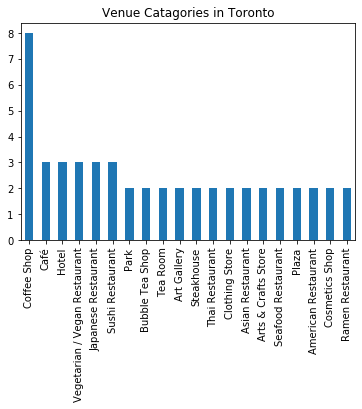

In [74]:
cata.value_counts()[:20].plot(kind = 'bar',title = 'Venue Catagories in Toronto')

In [69]:
cata2=pd.Series(nearby_venues2.categories)
cata2.value_counts()[:10]

Coffee Shop            8
Hotel                  4
French Restaurant      4
Italian Restaurant     3
Café                   3
Cocktail Bar           3
Sandwich Place         3
Falafel Restaurant     3
American Restaurant    3
Spa                    2
Name: categories, dtype: int64

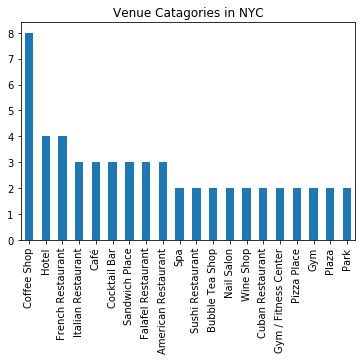

In [116]:
cata2.value_counts()[:20].plot(kind = 'bar',title = 'Venue Catagories in NYC')

After analyzing the venue catagories on both cities, we decide to explore the nearby venues of neighborhoods in both cities.

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [61]:
# Nearby Venues
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
toronto_venues.head()

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,"Rouge, Malvern",43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop
4,"Rouge, Malvern",43.806686,-79.194353,Lee Valley,43.803161,-79.199681,Hobby Shop


In [65]:
toronto_venues.groupby('Neighborhood').count().sort_values('Venue',ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Central Bay Street,100,100,100,100,100,100
Church and Wellesley,100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"Design Exchange, Toronto Dominion Centre",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Harbord, University of Toronto",100,100,100,100,100,100
"Harbourfront East, Toronto Islands, Union Station",100,100,100,100,100,100
"Little Portugal, Trinity",100,100,100,100,100,100


In [75]:
nyc_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )
nyc_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
3,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [85]:
nyc_venues.groupby('Neighborhood').count().sort_values('Venue',ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Murray Hill,165,165,165,165,165,165
Chelsea,121,121,121,121,121,121
Lincoln Square,100,100,100,100,100,100
Jackson Heights,100,100,100,100,100,100
Inwood,100,100,100,100,100,100
Hunters Point,100,100,100,100,100,100
Hudson Yards,100,100,100,100,100,100
Greenwich Village,100,100,100,100,100,100
Greenpoint,100,100,100,100,100,100


In [78]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [86]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns2 = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns2]

nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Sushi Restaurant,Theater,Asian Restaurant,Bar,Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
1,Agincourt,Badminton Court,Coffee Shop,Motorcycle Shop,Lounge,Skating Rink,Latin American Restaurant,Sandwich Place,Intersection,Clothing Store,Breakfast Spot
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Pizza Place,Noodle House,Malay Restaurant,Shop & Service,Caribbean Restaurant,Fast Food Restaurant,Chinese Restaurant,Food Court,Park,Bakery
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Fast Food Restaurant,Caribbean Restaurant,Sandwich Place,Fried Chicken Joint,Pharmacy,Beer Store,Hardware Store,Ethiopian Restaurant
4,"Alderwood, Long Branch",Pizza Place,Convenience Store,Sandwich Place,Gas Station,Pub,Coffee Shop,Gym,Pharmacy,Athletics & Sports,Skating Rink


In [84]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()[:10]

Coffee Shop                  22
Park                         13
Café                          7
Pizza Place                   6
Fast Food Restaurant          4
Indian Restaurant             4
Home Service                  3
Hockey Arena                  2
Japanese Restaurant           2
Middle Eastern Restaurant     2
Name: 1st Most Common Venue, dtype: int64

In [87]:
# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Donut Shop,Pizza Place,Pharmacy,Supermarket,Fast Food Restaurant,Martial Arts Dojo,Sandwich Place,Automotive Shop,Clothing Store,Electronics Store
1,Annadale,Pizza Place,Restaurant,Bakery,Pub,Sports Bar,Park,Sushi Restaurant,American Restaurant,Diner,Train Station
2,Arden Heights,Home Service,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Deli / Bodega,Farm,Fast Food Restaurant,Farmers Market,Zoo
3,Arlington,Boat or Ferry,Deli / Bodega,Bus Stop,Supermarket,Grocery Store,Financial or Legal Service,Event Space,Exhibit,Factory,Falafel Restaurant
4,Arrochar,Deli / Bodega,Italian Restaurant,Baseball Field,Pizza Place,Bus Stop,Beach,Cosmetics Shop,Liquor Store,Mediterranean Restaurant,Bagel Shop


In [89]:
neighborhoods_venues_sorted2['1st Most Common Venue'].value_counts()[:10]

Pizza Place             56
Italian Restaurant      35
Deli / Bodega           14
Caribbean Restaurant    14
Park                    12
Bar                     10
Bus Stop                10
Chinese Restaurant       9
Donut Shop               8
Coffee Shop              8
Name: 1st Most Common Venue, dtype: int64

### 3.K-means Clustering

In [105]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged = toronto_merged.dropna()
toronto_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3.0,Fast Food Restaurant,Coffee Shop,Hobby Shop,Spa,Women's Store,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,Breakfast Spot,Bar,Burger Joint,Women's Store,Event Space,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4.0,Pizza Place,Fast Food Restaurant,Sports Bar,Thrift / Vintage Store,Medical Center,Mexican Restaurant,Bus Line,Beer Store,Electronics Store,Moving Target
3,Scarborough,Woburn,43.770992,-79.216917,2.0,Coffee Shop,Park,Convenience Store,Business Service,Women's Store,Empanada Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
4,Scarborough,Cedarbrae,43.773136,-79.239476,1.0,Indian Restaurant,Bakery,Coffee Shop,Gym / Fitness Center,Caribbean Restaurant,Gas Station,Chinese Restaurant,Athletics & Sports,Fried Chicken Joint,Thai Restaurant


In [108]:
# create map
toronto_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(toronto_clusters)
       
toronto_clusters

In [111]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans2.labels_)

nyc_merged = df2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='Neighborhood')

nyc_merged = nyc_merged.dropna()
nyc_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,3,Caribbean Restaurant,Gas Station,Chinese Restaurant,Ice Cream Shop,Donut Shop,Dessert Shop,Fast Food Restaurant,Pharmacy,Fried Chicken Joint,Supermarket
1,Bronx,Co-op City,40.874294,-73.829939,3,Bus Station,Chinese Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mattress Store,Sandwich Place,Grocery Store,Bagel Shop,Dumpling Restaurant,Seafood Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,3,Caribbean Restaurant,Fast Food Restaurant,Diner,Nightclub,Historic Site,Shopping Mall,Chinese Restaurant,Grocery Store,Bakery,Seafood Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,1,Plaza,Art Gallery,River,Park,Home Service,Bus Station,Electronics Store,Flea Market,Fishing Store,Ethiopian Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,2,Bank,Pizza Place,Bagel Shop,Mexican Restaurant,Japanese Restaurant,Park,Playground,Diner,Baseball Field,Donut Shop


In [115]:
# create map
nyc_clusters = folium.Map(location=[latitude2, longitude2], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(nyc_clusters)
       
nyc_clusters